# Custom Display Logic Exercises

In [4]:
from IPython.display import display
from IPython.display import (
    display_png, display_html, display_latex,
    display_javascript, display_svg
)

## Circle class with custom display methods

Write a simple `MyCircle` Python class. Here is a skeleton to get you started:

```python
class MyCircle(object):
    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color
```

Now add special display methods to this class for the following representations (remember to wrap them in Python strings):

For HTML:

    &#x25CB;

For LaTeX (wrap with `$` and use a raw Python string):

    \bigcirc

For JavaScript:

    alert('I am a circle!');

After you write the class, create an instance and then use `display_html`, `display_svg`, `display_latex` and `display_javascript` to display those representations.

### Solution

Here is the solution to the simple `MyCircle` class:

In [5]:
# %load soln/mycircle.py
class MyCircle(object):

    def __init__(self, center=(0.0,0.0), radius=1.0, color='blue'):
        self.center = center
        self.radius = radius
        self.color = color

    def _repr_html_(self):
        return "&#x25CB; (<b>html</b>)"

    # Let's ignore that for now due to a bug in JupyterLab
    # def _repr_svg_(self):
    #     return """<svg width="100px" height="100px">
    #        <circle cx="50" cy="50" r="20" stroke="black" stroke-width="1" fill="blue"/>
    #     </svg>"""
    
    def _repr_latex_(self):
        return r"$\bigcirc \LaTeX$"


Now create an instance and use the display methods:

In [6]:
c = MyCircle()

In [7]:
display(c)

In [8]:
display_html(c)

○ ( html )

In [9]:
display_latex(c)

## PNG formatter for `MyCircle`

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

Now let's assume that the `MyCircle` class has already been defined and add a PNG representation using a formatter display function. Here is a function that converts a `MyCircle` instance to raw PNG data.

In [13]:
from IPython.core.pylabtools import print_figure

def circle_to_png(circle):
    """Render AnotherCircle to png data using matplotlib"""
    fig, ax = plt.subplots()
    patch = plt.Circle(circle.center,
                       radius=circle.radius,
                       fc=circle.color,
                       )
    ax.add_patch(patch)
    plt.axis('scaled')
    data = print_figure(fig, 'png')
    # We MUST close the figure, otherwise IPython's display machinery
    # will pick it up and send it as output, resulting in a double display
    plt.close(fig)
    return data

Now use the IPython API to get the PNG formatter (`image/png`) and call the `for_type` method to register `circle_to_png` as the display function for `MyCircle`.

In [14]:
# %load soln/mycircle_png.py
ip = get_ipython()
png_f = ip.display_formatter.formatters['image/png']
png_f.for_type(MyCircle, circle_to_png)

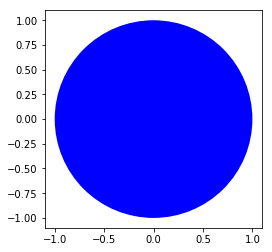

In [15]:
display_png(c)

## PNG formatter for NumPy arrays

In this exercise, you will register a display formatter function that generates a PNG representation of a 2d NumPy array. Here is the function that uses the [Python Imaging Library (PIL)](http://www.pythonware.com/products/pil/) to generate the raw PNG data:

In [19]:
from PIL import Image
from io import BytesIO
import numpy as np

def ndarray_to_png(x):
    if len(x.shape) != 2: return
    x = np.asarray(Image.fromarray(x).resize((500, 500)))
    x = (x - x.min()) / (x.max() - x.min())
    img = Image.fromarray((x*256).astype('uint8'))
    img_buffer = BytesIO()
    img.save(img_buffer, format='png')
    return img_buffer.getvalue()

Use the `for_type` method of the PNG formatter to register `ndarray_to_png` as the display function for `np.ndarray`.

In [20]:
# %load soln/ndarray_png.py
ip = get_ipython()
png_f = ip.display_formatter.formatters['image/png']
png_f.for_type(np.ndarray, ndarray_to_png)

Now create a few NumPy arrays and display them. Notice that their default representation in the Notebook is PNG rather than text.

In [21]:
a = np.random.rand(100,100)

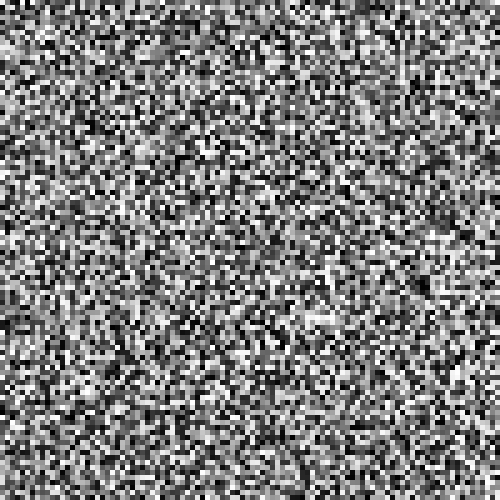

In [22]:
a

You can still display the plain text representation using the `display_pretty` function.

In [23]:
from IPython.display import display_pretty

In [24]:
display_pretty(a)

array([[0.92967279, 0.48750564, 0.1064083 , ..., 0.57348636, 0.81714701,
        0.99025104],
       [0.03006144, 0.77769092, 0.91105647, ..., 0.52540871, 0.49724196,
        0.34917279],
       [0.17264236, 0.49992543, 0.07619001, ..., 0.18225836, 0.9536891 ,
        0.29700476],
       ...,
       [0.36919322, 0.25921404, 0.46091289, ..., 0.93881815, 0.54034554,
        0.55480612],
       [0.49305754, 0.7522481 , 0.24159777, ..., 0.66186384, 0.65978332,
        0.92546111],
       [0.84391833, 0.43041799, 0.25084929, ..., 0.98915604, 0.19071223,
        0.94714139]])

In [25]:
b = np.linspace(0,100.0, 100**2).reshape((100,100))

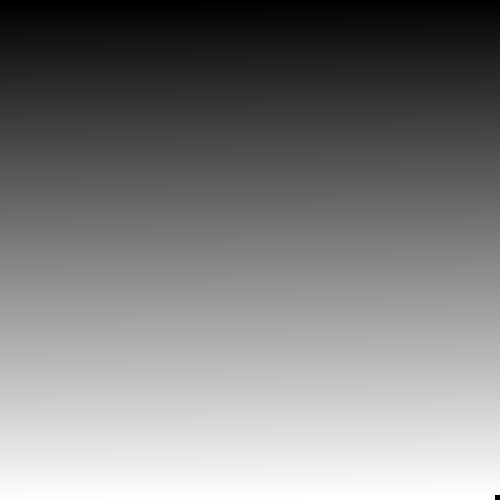

In [26]:
b